In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import (
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
    StandardScaler,
    PolynomialFeatures,
    FunctionTransformer,
)

# Raw - Mobility & Air quality

Importación de datos de calidad de aire y mobilidad

inicialmente se leen los datos crudos desde los archivos descargables de las  respectivas fuentes, se procede a compilar todos los datos de calidad de aire en 3 dataframe diferentes (Train, Test y Validation) que se convierten posteriormente a un archivo HDF5 el cual permite recolectar la información de manera más eficiente facilitando la lectura para proximas ocasiones, de igual maneraa se procede con los datos de mobilidad 

In [2]:
''' 
directory_path = 'C:/Users/MARIA PAULA/Downloads/EAFIT/Proyecto de Grado/Air Quality/Train'
dfs = []

for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory_path, filename)
        df = pd.read_csv(file_path)
        dfs.append(df)

Train_air = pd.concat(dfs, ignore_index=True)

# Save the combined DataFrame to an HDF5 file
Train_air.to_hdf('C:/Users/MARIA PAULA/Downloads/EAFIT/Proyecto de Grado/Air Quality/Train/train_air_dataframe.h5', key='df', mode='w')
''' 

" \ndirectory_path = 'C:/Users/MARIA PAULA/Downloads/EAFIT/Proyecto de Grado/Air Quality/Train'\ndfs = []\n\nfor filename in os.listdir(directory_path):\n    if filename.endswith('.csv'):\n        file_path = os.path.join(directory_path, filename)\n        df = pd.read_csv(file_path)\n        dfs.append(df)\n\nTrain_air = pd.concat(dfs, ignore_index=True)\n\n# Save the combined DataFrame to an HDF5 file\nTrain_air.to_hdf('C:/Users/MARIA PAULA/Downloads/EAFIT/Proyecto de Grado/Air Quality/Train/train_air_dataframe.h5', key='df', mode='w')\n"

In [3]:
# Load the DataFrame from the HDF5 file
Train_air = pd.read_hdf('C:/Users/MARIA PAULA/Downloads/EAFIT/Proyecto de Grado/Air Quality/Train/train_air_dataframe.h5', key='df')

In [4]:
Train_air.head()

,Fecha_Hora,codigoSerial,pm25,calidad_pm25,pm10,calidad_pm10,pm1,calidad_pm1,no,calidad_no,...,p_ssr,calidad_p_ssr,pliquida_ssr,calidad_pliquida_ssr,rglobal_ssr,calidad_rglobal_ssr,taire10_ssr,calidad_taire10_ssr,vviento_ssr,calidad_vviento_ssr
0,2021-01-01 00:00:00,12,31.0,1.0,49.0,1.0,-9999.0,1.0,-9999.0,4.31,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
1,2021-01-01 01:00:00,12,41.0,1.0,51.0,1.0,-9999.0,1.0,-9999.0,4.31,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
2,2021-01-01 02:00:00,12,38.0,1.0,51.0,1.0,-9999.0,1.0,-9999.0,4.31,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
3,2021-01-01 03:00:00,12,30.0,1.0,42.0,1.0,-9999.0,1.0,-9999.0,4.31,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0
4,2021-01-01 04:00:00,12,29.0,1.0,39.0,1.0,-9999.0,1.0,-9999.0,4.31,...,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0,-9999.0,1.0


In [5]:
Train_air.columns

Index(['Fecha_Hora', 'codigoSerial', 'pm25', 'calidad_pm25', 'pm10',
       'calidad_pm10', 'pm1', 'calidad_pm1', 'no', 'calidad_no', 'no2',
       'calidad_no2', 'nox', 'calidad_nox', 'ozono', 'calidad_ozono', 'co',
       'calidad_co', 'so2', 'calidad_so2', 'pst', 'calidad_pst', 'dviento_ssr',
       'calidad_dviento_ssr', 'haire10_ssr', 'calidad_haire10_ssr', 'p_ssr',
       'calidad_p_ssr', 'pliquida_ssr', 'calidad_pliquida_ssr', 'rglobal_ssr',
       'calidad_rglobal_ssr', 'taire10_ssr', 'calidad_taire10_ssr',
       'vviento_ssr', 'calidad_vviento_ssr'],
      dtype='object')

In [6]:
Air = Train_air.copy()
Air = Train_air[['Fecha_Hora', 'codigoSerial', 'pm25', 'calidad_pm25']]

Del dataset anterior unicamente se tomaran en cuanta las columnas de fecha_hora, codigoSerial, pm25 y calidad_pm25, ya que, las demás columnas al tener valores de -9999 y calidad 1 significan que los sensores están fuera de servicio y por la descripción del dataset se evidencia que solo las columnas de pm25 tienen un comportamiento diferente al mencionado

In [7]:
Air.loc[:,'Fecha_Hora'] = pd.to_datetime(Air['Fecha_Hora'], format='%Y-%m-%d %H:%M:%S')

In [8]:
# Establecer la columna 'fecha' como índice
Air.set_index('Fecha_Hora', inplace=True)

c:\Users\MARIA PAULA\.conda\envs\base3\Lib\site-packages\pandas\core\indexes\base.py:7588: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  return Index(sequences[0], name=names)


In [9]:
Air.head(10)

,codigoSerial,pm25,calidad_pm25
Fecha_Hora,,,
2021-01-01 00:00:00,12,31.0,1.0
2021-01-01 01:00:00,12,41.0,1.0
2021-01-01 02:00:00,12,38.0,1.0
2021-01-01 03:00:00,12,30.0,1.0
2021-01-01 04:00:00,12,29.0,1.0
2021-01-01 05:00:00,12,33.0,1.0
2021-01-01 06:00:00,12,26.0,1.0
2021-01-01 07:00:00,12,30.0,1.0
2021-01-01 08:00:00,12,31.0,1.0


La columna codigoSerial representa el codigo de la estacion con esta podemos saber donde se encuentra ubicada, para poder comparar los datos con el dataset de mobilidad

Comuna 10
CEN-TRAF - Centro - Plaza Botero


Comuna 16
Belén Altavista - I.E Pedro Octavio Amado
Belén - I.E Pedro Justo Barrio


Comuna 8
Villahermosa - Planta de Producción Agua Potable EPM


Comuna 14
El Poblado - I.E INEM Sede Santa Catalina


Comuna 13
San Cristóbal - Parque Biblioteca Fernando Botero


Comuna 4
Aranjuez - I.E Ciro Mendia


https://www.medellin.gov.co/es/conoce-algunos-datos-generales-de-la-ciudad/


In [10]:
Air['codigoSerial'].value_counts()

codigoSerial
12    21144
79    21144
80    21144
83    21144
84    21144
85    21144
86    20400
Name: count, dtype: int64

In [14]:
def missing_values(df):
    Column_Names = df.columns

    Total_rows = df.shape[0]

    missing_values = df.isnull().sum()

    Percent_missing = (missing_values / Total_rows)*100
    
    result = pd.DataFrame({
        'Column_Name': Column_Names,
        'Missing_Values': missing_values.values,
        'Total_Rows': Total_rows,
        'Percent_Missing': Percent_missing.values
    })

    return result

In [17]:
Air_organized = Air.pivot_table(index=Air.index, columns='codigoSerial', values=['pm25', 'calidad_pm25'], aggfunc = 'mean')

In [18]:
Air_organized.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21144 entries, 2021-01-01 00:00:00 to 2023-05-31 23:00:00
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (calidad_pm25, 12)  21144 non-null  float64
 1   (calidad_pm25, 79)  21144 non-null  float64
 2   (calidad_pm25, 80)  21144 non-null  float64
 3   (calidad_pm25, 83)  21144 non-null  float64
 4   (calidad_pm25, 84)  21144 non-null  float64
 5   (calidad_pm25, 85)  21144 non-null  float64
 6   (calidad_pm25, 86)  20400 non-null  float64
 7   (pm25, 12)          21144 non-null  float64
 8   (pm25, 79)          21144 non-null  float64
 9   (pm25, 80)          21144 non-null  float64
 10  (pm25, 83)          21144 non-null  float64
 11  (pm25, 84)          21144 non-null  float64
 12  (pm25, 85)          21144 non-null  float64
 13  (pm25, 86)          20400 non-null  float64
dtypes: float64(14)
memory usage: 2.4 MB


In [19]:
missing_values(Air_organized)

,Column_Name,Missing_Values,Total_Rows,Percent_Missing
0,"(calidad_pm25, 12)",0,21144,0.000000
1,"(calidad_pm25, 79)",0,21144,0.000000
2,"(calidad_pm25, 80)",0,21144,0.000000
3,"(calidad_pm25, 83)",0,21144,0.000000
4,"(calidad_pm25, 84)",0,21144,0.000000
5,"(calidad_pm25, 85)",0,21144,0.000000
6,"(calidad_pm25, 86)",744,21144,3.518729
7,"(pm25, 12)",0,21144,0.000000
8,"(pm25, 79)",0,21144,0.000000
9,"(pm25, 80)",0,21144,0.000000


Para los datos nulos que se encuentran en los datos asociados a la estación 86, se tienen 2 alternativas

1. **Forward or backward fill:** Use the value from the previous or next observation to fill null values. This method is especially useful for time series data.

df.fillna(method='ffill', inplace=True, axis=0)

2. **Interpolation:** Estimate missing values based on other values in the dataset. Pandas provides various interpolation methods such as linear, polynomial, or spline interpolation.

df.interpolate(method='linear', inplace=True, axis=0)

Inicialmente se llevara a cabo **Forward or backward fill** pues es más acorde al tipo de datos

In [16]:
# Forward fill null values
#Air_organized.fillna(method='ffill', inplace=True, axis=0)
Air_organized.ffill(axis=0, inplace=True)

In [22]:
Air_organized.describe()

calidad_pm25                                            \
codigoSerial            12            79            80            83   
count         27720.000000  27720.000000  27720.000000  27720.000000   
mean              1.204307      1.139662      1.149180      1.116052   
std               0.671783      0.553817      0.541952      0.525356   
min               1.000000      1.000000      1.000000      1.000000   
25%               1.000000      1.000000      1.000000      1.000000   
50%               1.000000      1.000000      1.000000      1.000000   
75%               1.000000      1.000000      1.000000      1.000000   
max               4.310000      4.320000      4.320000      4.320000   

                                                                pm25  \
codigoSerial            84            85            86            12   
count         27720.000000  27720.000000  27720.000000  27720.000000   
mean              1.144059      1.168476      1.154552   -182.821663   
std               0.570935      0.640962      0.563021   1457.658624   
min               1.000000      1.000000      1.000000  -9999.000000   
25%               1.000000      1.000000      1.000000     17.000000   
50%               1.000000      1.000000      1.000000     24.000000   
75%               1.000000      1.000000      1.000000     32.000000   
max               4.320000      4.320000      4.320000    995.000000   

                                                                         \
codigoSerial            79             80             83             84   
count         27720.000000   27720.000000   27720.000000   27720.000000   
mean            637.493060     254.198990     427.243486     460.474039   
std            8243.678606    5430.573054    7287.595887    7422.232152   
min           -9999.000000   -9999.000000   -9999.000000   -9999.000000   
25%              12.295325       9.662698      10.774600       9.590720   
50%              18.207700      15.482300      17.981500      14.742900   
75%              24.900925      21.532900      27.400025      20.808350   
max           99999.000000  104533.000000  117237.000000  117429.000000   

                                            
codigoSerial             85             86  
count          27720.000000   27720.000000  
mean             721.881973     397.038241  
std             9472.277093    7023.661600  
min            -9999.000000   -9999.000000  
25%                9.831675      12.769125  
50%               14.671450      17.667800  
75%               20.541575      23.803275  
max           100117.000000  108778.000000

| Rango de PM2.5 (µg/m³) | Nivel de Salud                     |
|--------------------------|------------------------------------|
| 0 - 50                   | Saludable                          |
| 51 - 100                 | Moderado                           |
| 101 - 150                | Poco saludable para grupos sensibles |
| 151 - 200                | Poco saludable para la población en general |
| Más de 200               | Muy poco saludable o peligroso     |


# Trusted - Air Quality

In [2]:
#Air_organized.to_hdf('C:/Users/MARIA PAULA/Downloads/EAFIT/Proyecto de Grado/Programacion/air_organized.h5', key='df', mode='w')

# Load the DataFrame from the HDF5 file
Air_organized = pd.read_hdf('air_organized.h5', key='df')

In [22]:
'''
import matplotlib.pyplot as plt
ncols = 3
# Crear subgráficos para cada columna en el DataFrame
fig, axes = plt.subplots(nrows=5, ncols=ncols, figsize=(15, 15))

# Iterar sobre cada columna y crear un histograma en su respectivo subplot
for i, columna in enumerate(Air_organized.columns):
    fila = i // ncols  # Calcular la fila actual
    columna_subplot = i % ncols  # Calcular la columna actual
    axes[fila, columna_subplot].hist(Air_organized[columna], bins=15, color='skyblue', alpha=0.7)
    axes[fila, columna_subplot].set_title(columna)
    axes[fila, columna_subplot].set_xlabel('Valor')
    axes[fila, columna_subplot].set_ylabel('Frecuencia')

# Ajustar el diseño de los subgráficos
plt.tight_layout()

# Mostrar los subgráficos
plt.show()
'''

"\nimport matplotlib.pyplot as plt\nncols = 3\n# Crear subgráficos para cada columna en el DataFrame\nfig, axes = plt.subplots(nrows=5, ncols=ncols, figsize=(15, 15))\n\n# Iterar sobre cada columna y crear un histograma en su respectivo subplot\nfor i, columna in enumerate(Air_organized.columns):\n    fila = i // ncols  # Calcular la fila actual\n    columna_subplot = i % ncols  # Calcular la columna actual\n    axes[fila, columna_subplot].hist(Air_organized[columna], bins=15, color='skyblue', alpha=0.7)\n    axes[fila, columna_subplot].set_title(columna)\n    axes[fila, columna_subplot].set_xlabel('Valor')\n    axes[fila, columna_subplot].set_ylabel('Frecuencia')\n\n# Ajustar el diseño de los subgráficos\nplt.tight_layout()\n\n# Mostrar los subgráficos\nplt.show()\n"

In [23]:
Air_organized.describe()

calidad_pm25                                            \
codigoSerial            12            79            80            83   
count         27720.000000  27720.000000  27720.000000  27720.000000   
mean              1.204307      1.139662      1.149180      1.116052   
std               0.671783      0.553817      0.541952      0.525356   
min               1.000000      1.000000      1.000000      1.000000   
25%               1.000000      1.000000      1.000000      1.000000   
50%               1.000000      1.000000      1.000000      1.000000   
75%               1.000000      1.000000      1.000000      1.000000   
max               4.310000      4.320000      4.320000      4.320000   

                                                                pm25  \
codigoSerial            84            85            86            12   
count         27720.000000  27720.000000  27720.000000  27720.000000   
mean              1.144059      1.168476      1.154552   -182.821663   
std               0.570935      0.640962      0.563021   1457.658624   
min               1.000000      1.000000      1.000000  -9999.000000   
25%               1.000000      1.000000      1.000000     17.000000   
50%               1.000000      1.000000      1.000000     24.000000   
75%               1.000000      1.000000      1.000000     32.000000   
max               4.320000      4.320000      4.320000    995.000000   

                                                                         \
codigoSerial            79             80             83             84   
count         27720.000000   27720.000000   27720.000000   27720.000000   
mean            637.493060     254.198990     427.243486     460.474039   
std            8243.678606    5430.573054    7287.595887    7422.232152   
min           -9999.000000   -9999.000000   -9999.000000   -9999.000000   
25%              12.295325       9.662698      10.774600       9.590720   
50%              18.207700      15.482300      17.981500      14.742900   
75%              24.900925      21.532900      27.400025      20.808350   
max           99999.000000  104533.000000  117237.000000  117429.000000   

                                            
codigoSerial             85             86  
count          27720.000000   27720.000000  
mean             721.881973     397.038241  
std             9472.277093    7023.661600  
min            -9999.000000   -9999.000000  
25%                9.831675      12.769125  
50%               14.671450      17.667800  
75%               20.541575      23.803275  
max           100117.000000  108778.000000

### Manejo de Outliers
To find outliers in each column of your dataset using a clustering approach, iI use density-based clustering algorithms, in this case DBSCAN (Density-Based Spatial Clustering of Applications with Noise).
where I have 2 hyperparameters:

* eps: Controls the size of the neighborhood around each point.

* min_samples: Determines how many points need to be within the neighborhood for a point to be considered a core point.


Una vez detectados los outlier se cambia su valor por el valor del quantile 90%, esto para denotar que es un valor alto sin embargo no el que se muestra fuera de escala como estaba originalmente, por otro lado, aquellos valores negativos que se encuentran se cambian a cero puesto que no tiene sentido que haya valores negativos

In [3]:
from sklearn.cluster import DBSCAN

Air_median = Air_organized.copy()

# Apply DBSCAN to each column
outlier_indices = {}
for col in Air_organized.columns[1:]:  # Excluding the 'codigoSerial' column
    X = np.array(Air_organized[col]).reshape(-1, 1)  # Reshape to meet input requirements of DBSCAN
    dbscan = DBSCAN(eps=20, min_samples=1000) 
    dbscan.fit(X)
    # Convert indices to datetime values
    outlier_indices[col] = Air_organized.index[dbscan.labels_ == -1]

    # Replace outliers with the 0.9 quantile value of each column
    quantile_value = Air_organized[col].quantile(0.9)
    # Iterate over the outlier indices and replace the values
    for index in outlier_indices[col]:
        # Check if the value is negative, and if so, change it to zero
        if Air_median.at[index, col] < 0:
            Air_median.at[index, col] = 0
        else:
            Air_median.at[index, col] = quantile_value


In [ ]:
'''
# Count outliers for each column
outlier_counts = {}

for col in Air_organized.columns[1:]:  # Exclude the "codigoSerial" column
    outlier_counts[col] = len(outlier_indices[col])

# Print outlier counts for each column
for col, count in outlier_counts.items():
    print(f"Number of outliers in {col}: {count}")
'''

Number of outliers in ('calidad_pm25', 79): 0
Number of outliers in ('calidad_pm25', 80): 0
Number of outliers in ('calidad_pm25', 83): 0
Number of outliers in ('calidad_pm25', 84): 0
Number of outliers in ('calidad_pm25', 85): 0
Number of outliers in ('calidad_pm25', 86): 0
Number of outliers in ('pm25', 12): 829
Number of outliers in ('pm25', 79): 384
Number of outliers in ('pm25', 80): 252
Number of outliers in ('pm25', 83): 472
Number of outliers in ('pm25', 84): 487
Number of outliers in ('pm25', 85): 753
Number of outliers in ('pm25', 86): 441


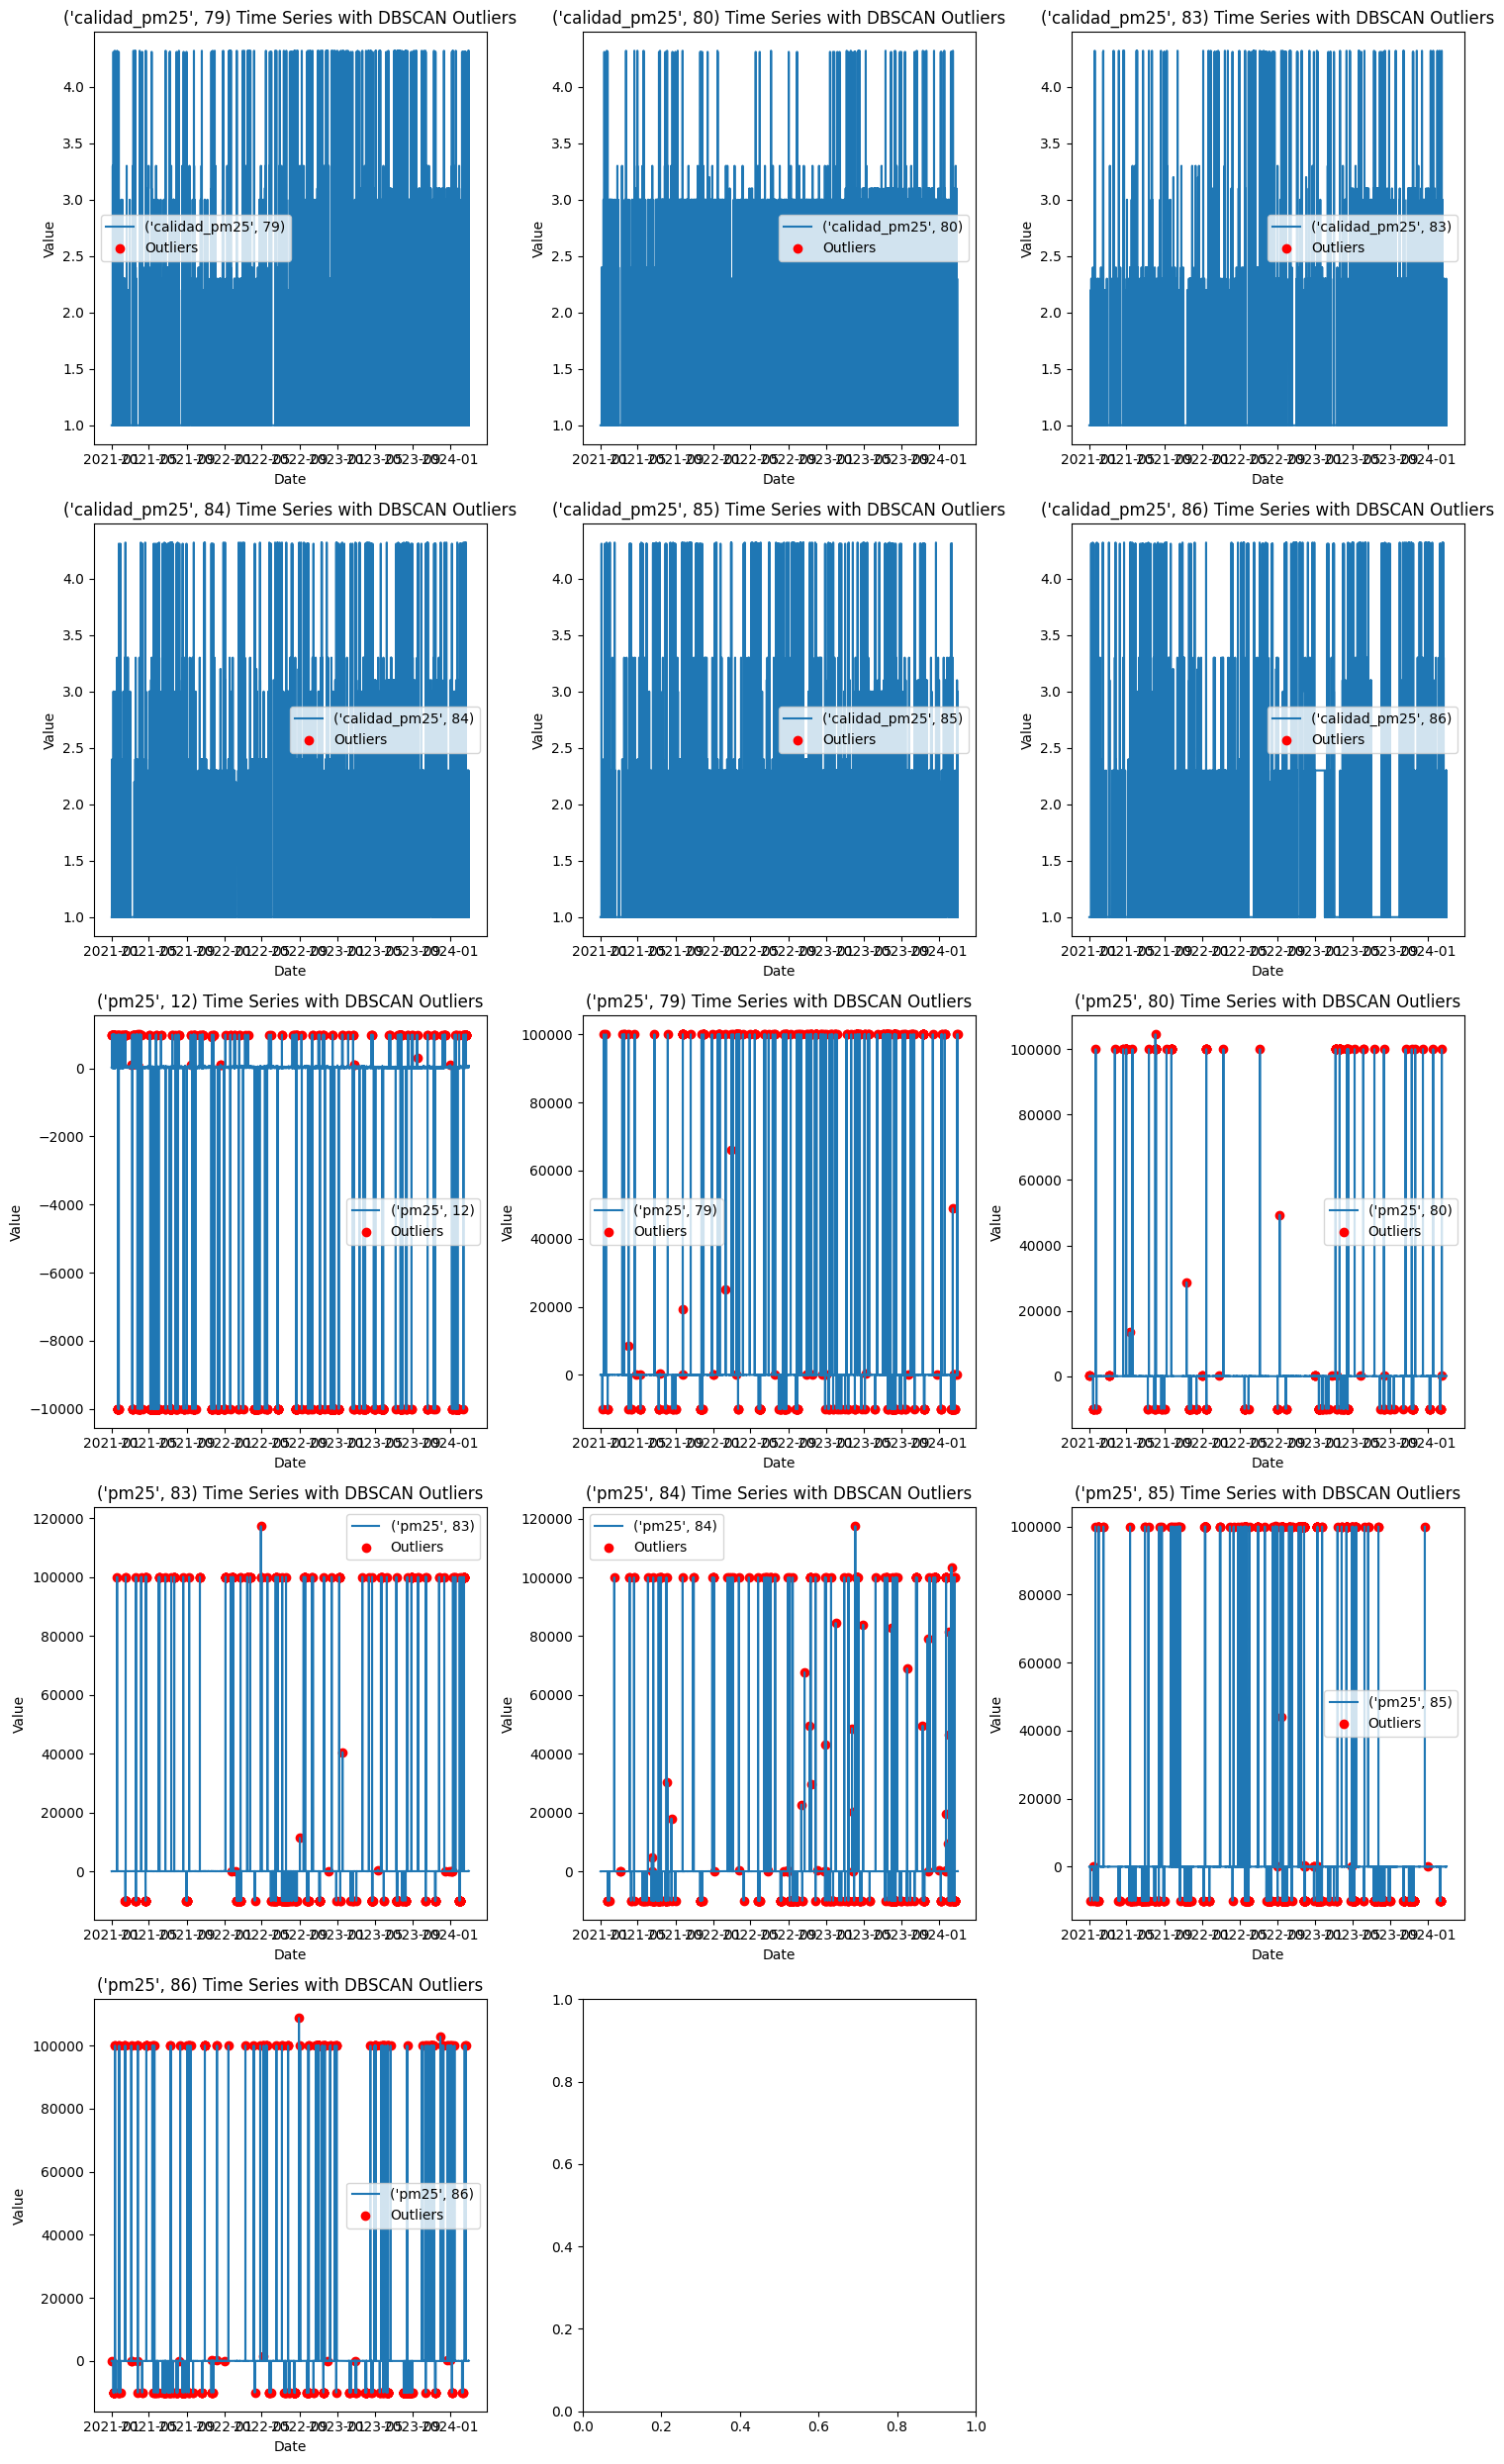

In [ ]:
'''
import matplotlib.pyplot as plt

# Determine the number of columns and rows for the grid
num_cols = 3  # Number of columns in the grid
num_rows = (len(Air_organized.columns) - 1) // num_cols + 1  # Number of rows needed

# Plot each time series along with outliers in a grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for i, col in enumerate(Air_organized.columns[1:]):  # Exclude the "codigoSerial" column
    row_idx = i // num_cols
    col_idx = i % num_cols
    
    axes[row_idx, col_idx].plot(Air_organized.index, Air_organized[col], label=col)
    
    # Plot outliers
    outliers = Air_organized.loc[outlier_indices[col], col]
    axes[row_idx, col_idx].scatter(outliers.index, outliers, color='red', label='Outliers')
    
    axes[row_idx, col_idx].set_title(f"{col} Time Series with DBSCAN Outliers")
    axes[row_idx, col_idx].set_xlabel("Date")
    axes[row_idx, col_idx].set_ylabel("Value")
    axes[row_idx, col_idx].legend()

# Hide empty subplots if any
for i in range(len(Air_organized.columns) % num_cols, num_cols):
    axes[num_rows - 1, i].axis('off')

plt.tight_layout()
plt.show()
'''

In [4]:
for col in Air_median.columns:
    # Replace negative values with zero
    Air_median[col] = Air_median[col].apply(lambda x: 0 if x < 0 else x)

In [5]:
Air_median.describe()

calidad_pm25                                            \
codigoSerial            12            79            80            83   
count         27720.000000  27720.000000  27720.000000  27720.000000   
mean              1.204307      1.139662      1.149180      1.116052   
std               0.671783      0.553817      0.541952      0.525356   
min               1.000000      1.000000      1.000000      1.000000   
25%               1.000000      1.000000      1.000000      1.000000   
50%               1.000000      1.000000      1.000000      1.000000   
75%               1.000000      1.000000      1.000000      1.000000   
max               4.310000      4.320000      4.320000      4.320000   

                                                                pm25  \
codigoSerial            84            85            86            12   
count         27720.000000  27720.000000  27720.000000  27720.000000   
mean              1.144059      1.168476      1.154552     24.613835   
std               0.570935      0.640962      0.563021     11.909279   
min               1.000000      1.000000      1.000000      0.000000   
25%               1.000000      1.000000      1.000000     17.000000   
50%               1.000000      1.000000      1.000000     24.000000   
75%               1.000000      1.000000      1.000000     32.000000   
max               4.320000      4.320000      4.320000     88.000000   

                                                                      \
codigoSerial            79            80            83            84   
count         27720.000000  27720.000000  27720.000000  27720.000000   
mean             19.141890     16.164630     19.816923     15.735784   
std              10.143154      9.582474     12.202138      9.097448   
min               0.000000      0.000000      0.000000      0.000000   
25%              12.295325      9.662698     10.774600      9.590720   
50%              18.207700     15.482300     17.981500     14.742900   
75%              24.900925     21.532900     27.400025     20.808350   
max              78.980900     71.911300     83.156700     71.714800   

                                          
codigoSerial            85            86  
count         27720.000000  27720.000000  
mean             15.624423     19.356999  
std               8.606742     11.051160  
min               0.000000      0.000000  
25%               9.831675     12.769125  
50%              14.671450     17.667800  
75%              20.541575     23.803275  
max              70.085200     82.171400

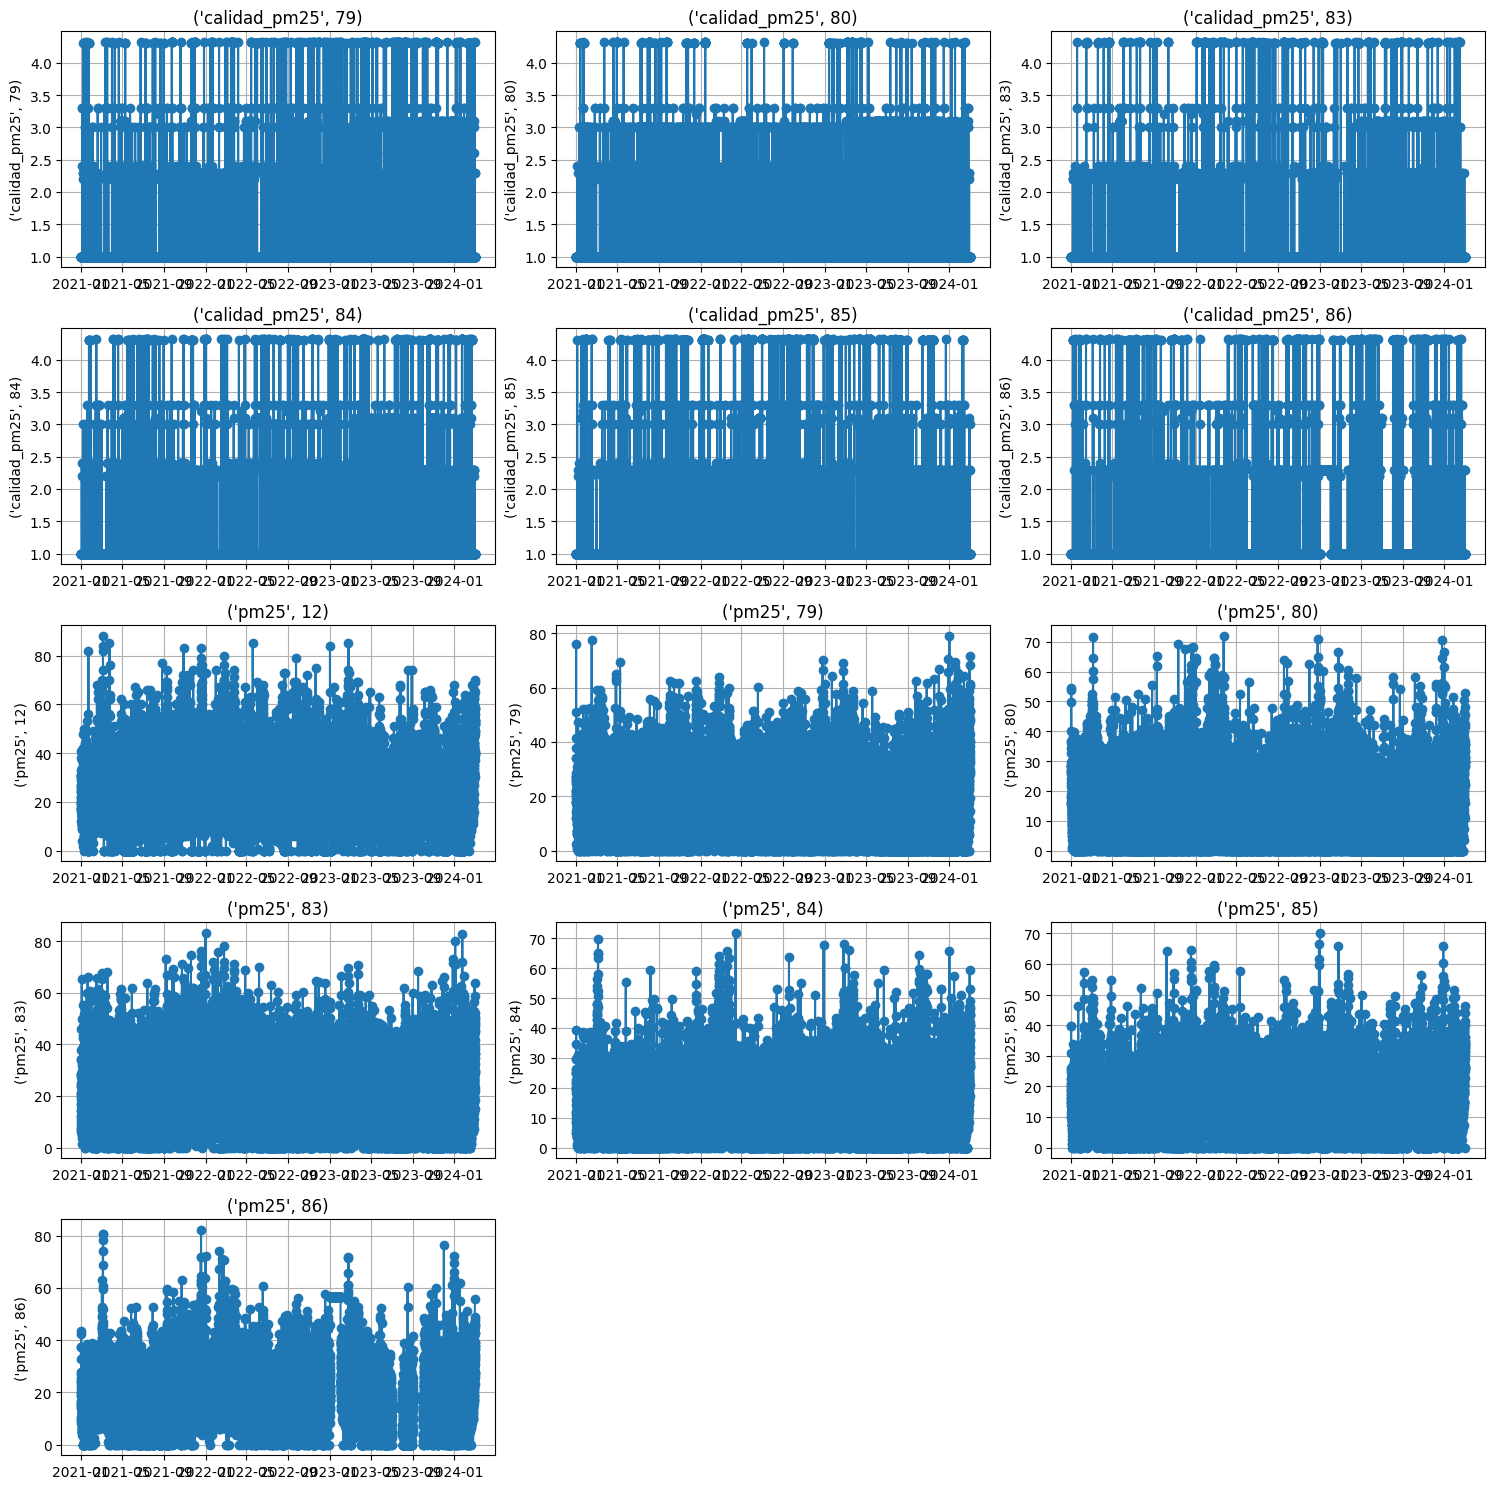

In [6]:
import matplotlib.pyplot as plt
# Define the number of rows and columns for the grid
num_rows = 5
num_cols = (len(Air_median.columns) - 1) // num_rows + 1  # Excluding the 'codigoSerial' column

# Create a grid of plots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each column
for i, col in enumerate(Air_median.columns[1:]):  # Exclude the 'codigoSerial' column
    ax = axes[i] if i < len(axes) else None
    ax.plot(Air_median.index, Air_median[col], marker='o', linestyle='-')
    ax.set_title(col)
    ax.set_xlabel('')
    ax.set_ylabel(col)
    ax.grid(True)

# Hide any empty subplots
for ax in axes[len(Air_median.columns[1:]):]:
    if ax is not None:
        ax.axis('off')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [ ]:
Air_median.describe()

calidad_pm25                                            \
codigoSerial            12            79            80            83   
count         27720.000000  27720.000000  27720.000000  27720.000000   
mean              1.204307      1.139662      1.149180      1.116052   
std               0.671783      0.553817      0.541952      0.525356   
min               1.000000      1.000000      1.000000      1.000000   
25%               1.000000      1.000000      1.000000      1.000000   
50%               1.000000      1.000000      1.000000      1.000000   
75%               1.000000      1.000000      1.000000      1.000000   
max               4.310000      4.320000      4.320000      4.320000   

                                                                pm25  \
codigoSerial            84            85            86            12   
count         27720.000000  27720.000000  27720.000000  27720.000000   
mean              1.144059      1.168476      1.154552     24.600126   
std               0.570935      0.640962      0.563021     11.942614   
min               1.000000      1.000000      1.000000    -15.000000   
25%               1.000000      1.000000      1.000000     17.000000   
50%               1.000000      1.000000      1.000000     24.000000   
75%               1.000000      1.000000      1.000000     32.000000   
max               4.320000      4.320000      4.320000     88.000000   

                                                                      \
codigoSerial            79            80            83            84   
count         27720.000000  27720.000000  27720.000000  27720.000000   
mean             19.039815     15.923048     19.784527     15.674143   
std              10.387598     10.113891     12.270619      9.235737   
min             -18.717100    -18.604500    -18.994400    -19.042300   
25%              12.295325      9.662698     10.774600      9.590720   
50%              18.207700     15.482300     17.981500     14.742900   
75%              24.900925     21.532900     27.400025     20.808350   
max              78.980900     71.911300     83.156700     71.714800   

                                          
codigoSerial            85            86  
count         27720.000000  27720.000000  
mean             15.563676     19.318592  
std               8.764277     11.143000  
min             -19.340000    -18.579700  
25%               9.831675     12.769125  
50%              14.671450     17.667800  
75%              20.541575     23.803275  
max              70.085200     82.171400

Guardo los datos transformados

In [ ]:
# Specify the file path
file_path = 'C:/Users/MARIA PAULA/Downloads/EAFIT/Proyecto de Grado/Programacion/Air_median.h5'

# Save DataFrame to HDF5 file
Air_median.to_hdf(file_path, key='df', mode='w')

Grafico la nueva distribución de los datos luego de la limpieza

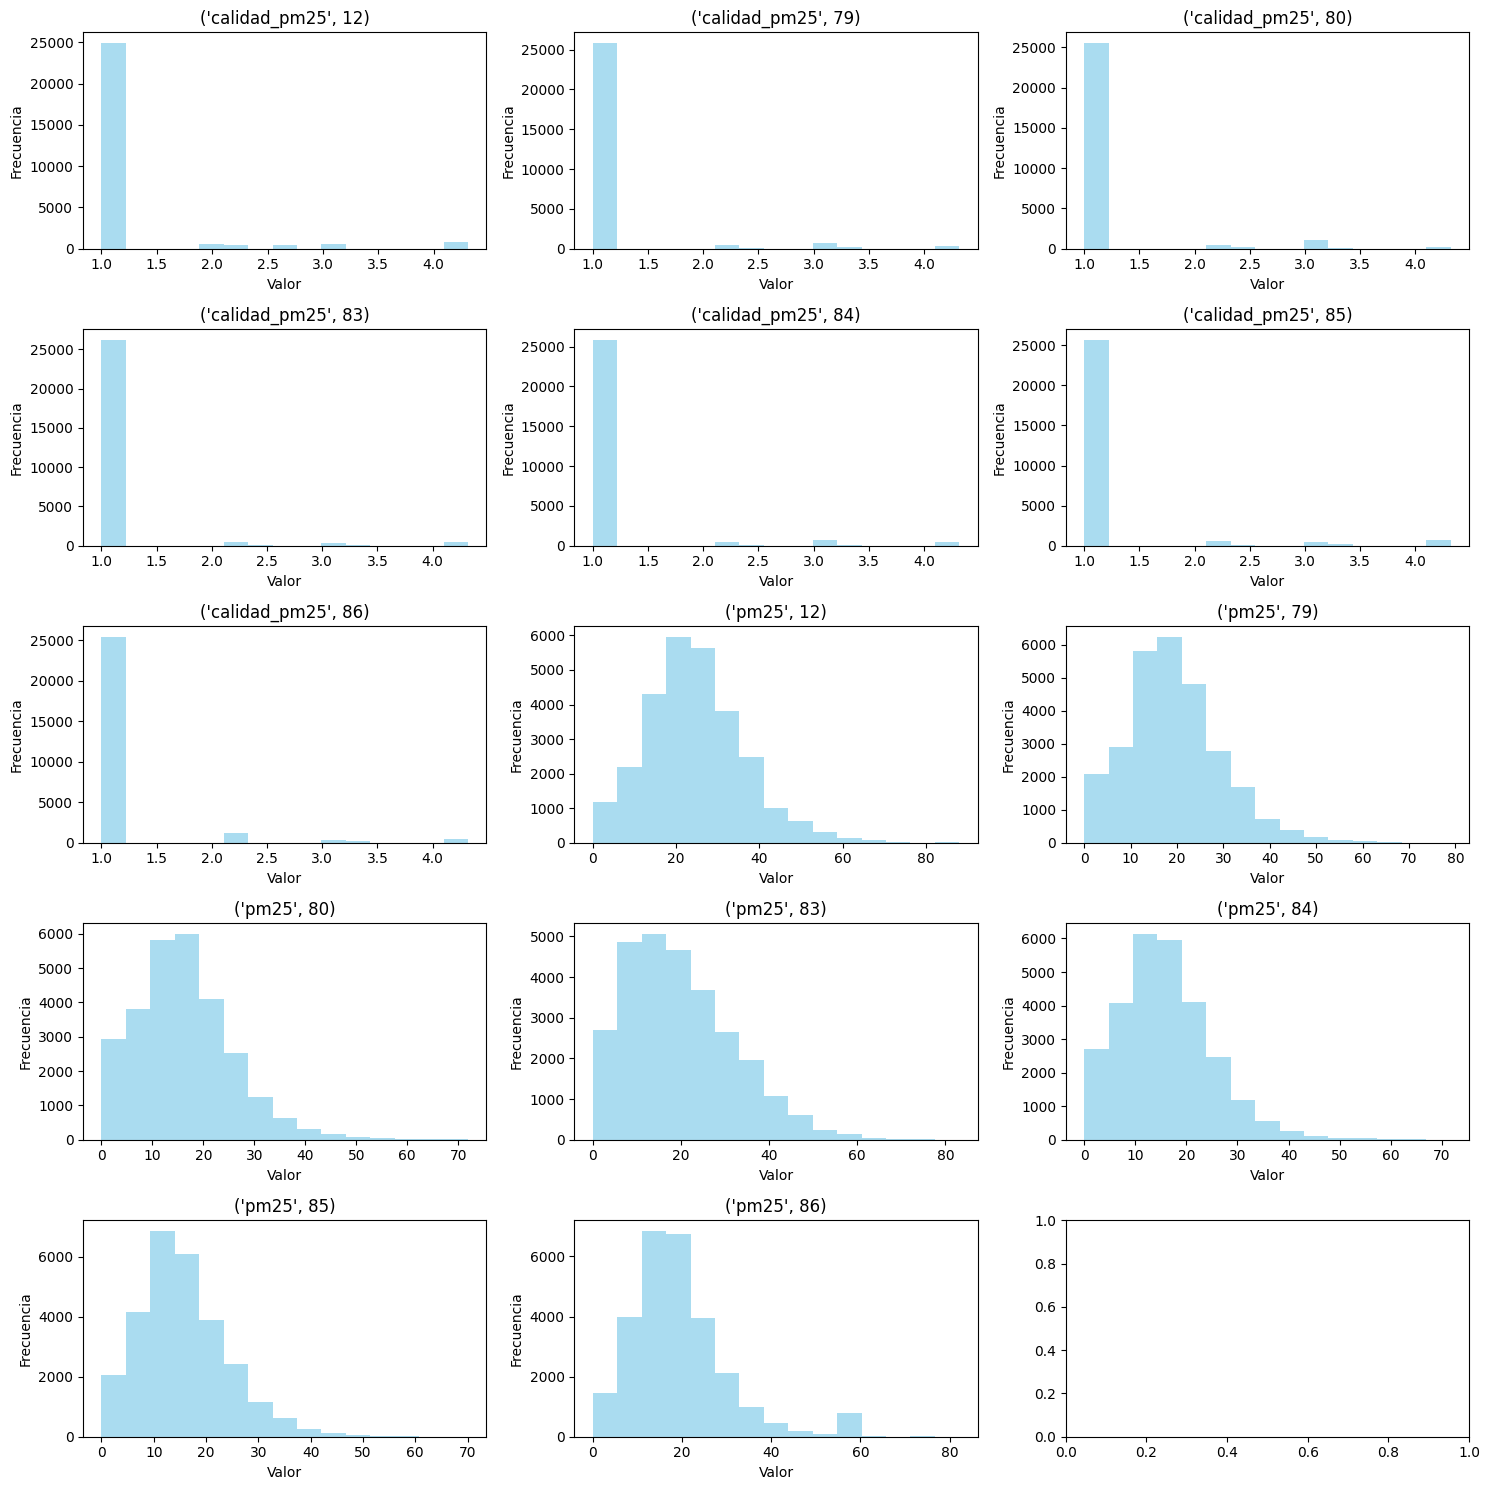

In [ ]:
ncols = 3
# Crear subgráficos para cada columna en el DataFrame
fig, axes = plt.subplots(nrows=5, ncols=ncols, figsize=(15, 15))

# Iterar sobre cada columna y crear un histograma en su respectivo subplot
for i, columna in enumerate(Air_median.columns):
    fila = i // ncols  # Calcular la fila actual
    columna_subplot = i % ncols  # Calcular la columna actual
    axes[fila, columna_subplot].hist(Air_median[columna], bins=15, color='skyblue', alpha=0.7)
    axes[fila, columna_subplot].set_title(columna)
    axes[fila, columna_subplot].set_xlabel('Valor')
    axes[fila, columna_subplot].set_ylabel('Frecuencia')

# Ajustar el diseño de los subgráficos
plt.tight_layout()

# Mostrar los subgráficos
plt.show()

# Trusted -  Mobility 

In [18]:
# Load the DataFrame from the HDF5 file
Mobilidad = pd.read_hdf('combined_dataframe.h5', key='df')

In [19]:
Mobilidad.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17010267 entries, 0 to 17010266
Data columns (total 32 columns):
 #   Column               Dtype         
---  ------               -----         
 0   Carril               object        
 1   Fecha Trafico        datetime64[ns]
 2   Fecha                datetime64[ns]
 3   Hora                 int64         
 4   dia                  object        
 5   dia-num              int64         
 6   mes-num              int64         
 7   mes                  object        
 8   año                  int64         
 9   Velocidad (Km/h)     float64       
 10  Corredor             object        
 11  sentido              object        
 12  Operación            object        
 13  Intensidad           float64       
 14  Nº vehiculos long 1  float64       
 15  Nº vehiculos long 2  float64       
 16  Nº vehiculos long 3  float64       
 17  Ocupación            float64       
 18  Tipo de Subsistema   object        
 19  Longitud             flo

In [20]:
Mobilidad.set_index('Fecha Trafico')

,Carril,Fecha,Hora,dia,dia-num,mes-num,mes,año,Velocidad (Km/h),Corredor,...,Comuna,codigo comuna,nombre comuna,Nº vehiculos long 4,Intensidad (veh/h),Ocupación (%),Categoria 1 (Veh/h),Categoria 2 (Veh/h),Categoria 3 (Veh/h),Categoria 4 (Veh/h)
Fecha Trafico,,,,,,,,,,,,,,,,,,,,,
2021-01-01 00:00:00,XC-1-BOL-65-ENT:ORI-OCC,2021-01-01,0,Viernes,5,1,Enero,2021,24.0,Avenida Bolivariana,...,11 - Laureles Estadio,11.0,Laureles Estadio,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 01:00:00,XC-1-BOL-65-ENT:ORI-OCC,2021-01-01,1,Viernes,5,1,Enero,2021,21.0,Avenida Bolivariana,...,11 - Laureles Estadio,11.0,Laureles Estadio,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 02:00:00,XC-1-BOL-65-ENT:ORI-OCC,2021-01-01,2,Viernes,5,1,Enero,2021,22.0,Avenida Bolivariana,...,11 - Laureles Estadio,11.0,Laureles Estadio,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 03:00:00,XC-1-BOL-65-ENT:ORI-OCC,2021-01-01,3,Viernes,5,1,Enero,2021,23.0,Avenida Bolivariana,...,11 - Laureles Estadio,11.0,Laureles Estadio,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-01-01 04:00:00,XC-1-BOL-65-ENT:ORI-OCC,2021-01-01,4,Viernes,5,1,Enero,2021,24.0,Avenida Bolivariana,...,11 - Laureles Estadio,11.0,Laureles Estadio,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,HK-10-C50-C81A-ENT:ORI-OCC,2022-12-31,19,Sábado,6,12,Diciembre,2022,17.0,Calle 50,...,12 - La América,12.0,La América,80.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-31 20:00:00,HK-10-C50-C81A-ENT:ORI-OCC,2022-12-31,20,Sábado,6,12,Diciembre,2022,16.0,Calle 50,...,12 - La América,12.0,La América,80.0,NaN,NaN,NaN,NaN,NaN,NaN
2022-12-31 21:00:00,HK-10-C50-C81A-ENT:ORI-OCC,2022-12-31,21,Sábado,6,12,Diciembre,2022,20.0,Calle 50,...,12 - La América,12.0,La América,93.0,NaN,NaN,NaN,NaN,NaN,NaN


In [87]:
Mobilidad['codigo comuna'].unique()

array([ 11.,  16.,  14.,  10.,  nan,   7.,  12.,   5.,  99.,  15.,  60.,
       100., 101., 102.,   4.,   6.,  13.,   9.])

In [88]:
Mob = Mobilidad.copy()
Mob.columns


Index(['Carril', 'Fecha Trafico', 'Fecha', 'Hora', 'dia', 'dia-num', 'mes-num',
       'mes', 'año', 'Velocidad (Km/h)', 'Corredor', 'sentido', 'Operación',
       'Intensidad', 'Nº vehiculos long 1', 'Nº vehiculos long 2',
       'Nº vehiculos long 3', 'Ocupación', 'Tipo de Subsistema', 'Longitud',
       'Latitud', 'Identificador (F/V)', 'Comuna', 'codigo comuna',
       'nombre comuna', 'Nº vehiculos long 4', 'Intensidad (veh/h)',
       'Ocupación (%)', 'Categoria 1 (Veh/h)', 'Categoria 2 (Veh/h)',
       'Categoria 3 (Veh/h)', 'Categoria 4 (Veh/h)'],
      dtype='object')

In [ ]:
Mob = Mob[['Fecha Trafico', 'Velocidad (Km/h)', 'Operación',
       'Intensidad', 'Nº vehiculos long 1', 'Nº vehiculos long 2',
       'Nº vehiculos long 3', 'Ocupación', 'codigo comuna',
       'nombre comuna']]

In [98]:
Mob.set_index('Fecha Trafico')

,Velocidad (Km/h),Operación,Intensidad,Nº vehiculos long 1,Nº vehiculos long 2,Nº vehiculos long 3,Ocupación,codigo comuna,nombre comuna
Fecha Trafico,,,,,,,,,
2021-01-01 00:00:00,24.0,interrumpido,56.0,55.0,1.0,0.0,5.0,11.0,Laureles Estadio
2021-01-01 01:00:00,21.0,interrumpido,69.0,68.0,1.0,0.0,4.0,11.0,Laureles Estadio
2021-01-01 02:00:00,22.0,interrumpido,48.0,48.0,0.0,0.0,4.0,11.0,Laureles Estadio
2021-01-01 03:00:00,23.0,interrumpido,63.0,62.0,1.0,0.0,2.0,11.0,Laureles Estadio
2021-01-01 04:00:00,24.0,interrumpido,60.0,56.0,3.0,1.0,7.0,11.0,Laureles Estadio
...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00,17.0,Interrumpido,300.0,218.0,2.0,0.0,47.0,12.0,La América
2022-12-31 20:00:00,16.0,Interrumpido,301.0,220.0,1.0,0.0,46.0,12.0,La América
2022-12-31 21:00:00,20.0,Interrumpido,310.0,215.0,1.0,1.0,45.0,12.0,La América


VOY ACA, falta quitar las comunas que no necesito, arreglar nulos como lo hice en Air_organized y mirar como unir ambos dataframes para sacar la matriz de correlacion, las vbles categoricas de Mob hay que codificarlas tambien

In [ ]:
Features = pd.DataFrame(Mobilidad.drop(['Wage', 'Name'], axis=1))

numerical_fea = Features.select_dtypes(include = np.number).columns
print('Caracteristicas numericas: ', numerical_fea)

categorical_fea = Features.select_dtypes(include = 'object').columns
print('\n','Caracteristicas numericas: ', categorical_fea)

In [23]:
Mob = Mobilidad[['Velocidad (Km/h)',
       'Intensidad', 'Nº vehiculos long 1', 'Nº vehiculos long 2',
       'Nº vehiculos long 3', 'Ocupación', 'Longitud',
       'Latitud', 'codigo comuna']]

In [24]:
Mob.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17010267 entries, 0 to 17010266
Data columns (total 18 columns):
 #   Column               Dtype  
---  ------               -----  
 0   dia-num              int64  
 1   mes-num              int64  
 2   Velocidad (Km/h)     float64
 3   Intensidad           float64
 4   Nº vehiculos long 1  float64
 5   Nº vehiculos long 2  float64
 6   Nº vehiculos long 3  float64
 7   Ocupación            float64
 8   Longitud             float64
 9   Latitud              float64
 10  codigo comuna        float64
 11  Nº vehiculos long 4  float64
 12  Intensidad (veh/h)   float64
 13  Ocupación (%)        float64
 14  Categoria 1 (Veh/h)  float64
 15  Categoria 2 (Veh/h)  float64
 16  Categoria 3 (Veh/h)  float64
 17  Categoria 4 (Veh/h)  float64
dtypes: float64(16), int64(2)
memory usage: 2.4 GB


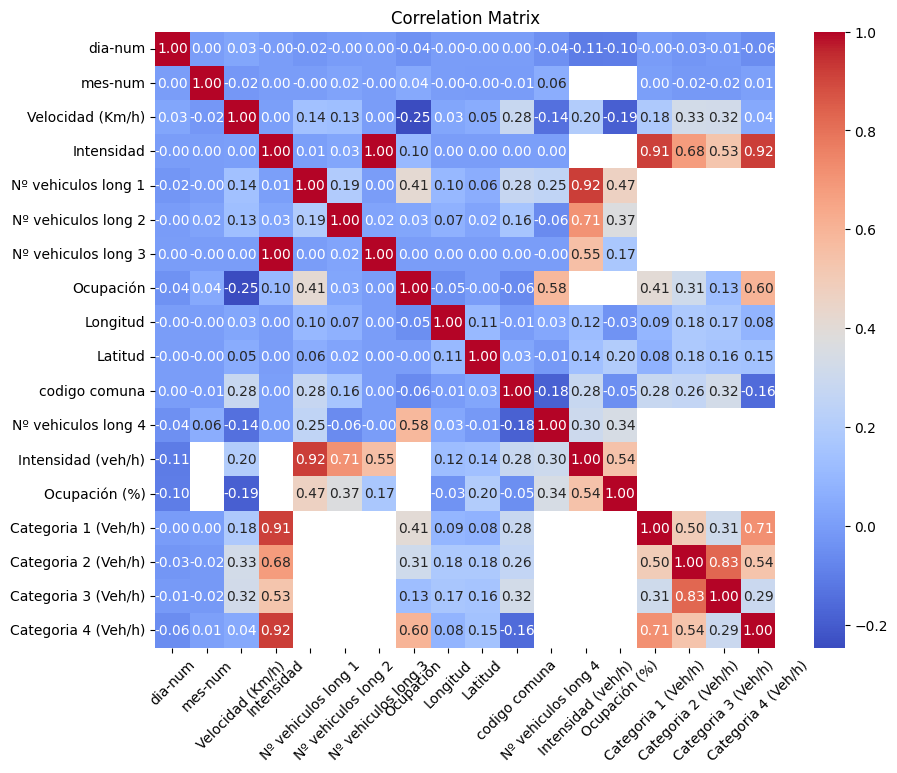

In [25]:
# Calculate the correlation matrix
correlation_matrix = Mob.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add a title
plt.title('Correlation Matrix')

# Rotate the tick labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()